# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [1]:
pip install citipy


  Stored in directory: C:\Users\umnaz\AppData\Local\pip\Cache\wheels\6f\07\0d\0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# starting URL for weathermap API call

url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}" 

# list of city data

city_data =[]

#print to logger

print("Beginning Data Retrieval")
print("_" *15)

# Create counters

record_count = 1
set_count = 1

# loop through all the cities in our list
for index, city in enumerate(cities):
    
    #Group cities in sets of 50 for login purpose
    
    if (index% 50 == 0 and index>= 50):
        set_count += 1
        record_count = 0
        
        # Create endpoint URL with each city
        city_url = url + "&q=" + city
        
        # log the url record and set number
        
        print( f"Processing Record {record_count} of Set {set_count} | {city}" )
        
        record_count += 1
        
        # Run an API request for each of the cities
        
        try:
            # Parse the JSON and retrieve data
            city_weather = requests.get(city_url).json()
            
            # Extract out max temp humidity and cloudiness
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]
            
            # Append the city info into city data list
            
            city_data.append({
                "City":city,
                "Lat": city_lat,
                "lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
            
        except:
            print ("City not found. Skipping ...")
            pass
            
# Indicate that data loading is complete
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")


Beginning Data Retrieval
_______________
Processing Record 0 of Set 2 | ponta do sol
Processing Record 0 of Set 3 | kodiak
Processing Record 0 of Set 4 | abu dhabi
Processing Record 0 of Set 5 | vaitupu
City not found. Skipping ...
Processing Record 0 of Set 6 | caravelas
Processing Record 0 of Set 7 | ylojarvi
Processing Record 0 of Set 8 | cumaribo
City not found. Skipping ...
Processing Record 0 of Set 9 | butka
Processing Record 0 of Set 10 | prince rupert
Processing Record 0 of Set 11 | vestmanna
Processing Record 0 of Set 12 | lufilufi
-----------------------
Data Retrieval Complete
-----------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
 # Convert array of JSON into pandas
city_data_df = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

city_data_df.to_csv(output_data_file, index_label = "City_ID")
city_data_df.count()

City          9
Cloudiness    9
Country       9
Date          9
Humidity      9
Lat           9
Max Temp      9
Wind Speed    9
lng           9
dtype: int64

In [10]:
 # Display city data frame
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Max Temp,Wind Speed,lng
0,ponta do sol,20,PT,1587862499,72,32.67,60.80,4.70,-17.10
1,kodiak,90,US,1587862499,70,57.79,44.60,11.41,-152.41
2,abu dhabi,0,AE,1587862499,23,24.47,84.20,5.82,54.37
3,caravelas,45,BR,1587862500,85,-17.71,76.44,17.31,-39.25
4,ylojarvi,18,FI,1587862503,79,61.56,27.00,3.36,23.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

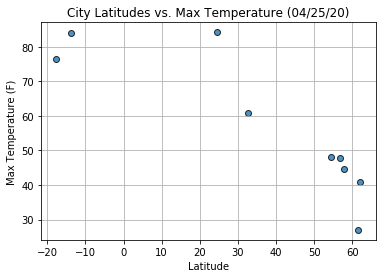

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidth =1, marker ="o",
            alpha = 0.8 , label = "Cities")

plt.title(f"City Latitudes vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot

plt.show()
           
           

#### Latitude vs. Humidity Plot

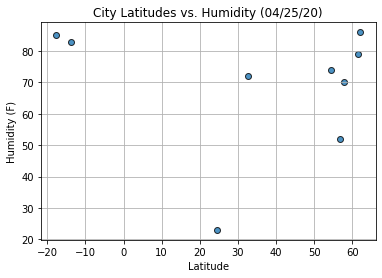

In [13]:
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidth =1, marker ="o",
            alpha = 0.8 , label = "Cities")

plt.title(f"City Latitudes vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot

plt.show()

#### Latitude vs. Cloudiness Plot

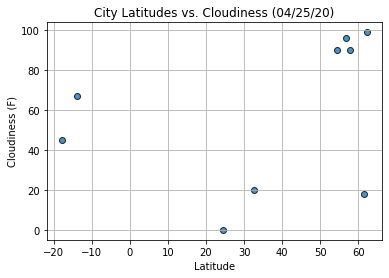

In [14]:
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidth =1, marker ="o",
            alpha = 0.8 , label = "Cities")

plt.title(f"City Latitudes vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot

plt.show()

#### Latitude vs. Wind Speed Plot

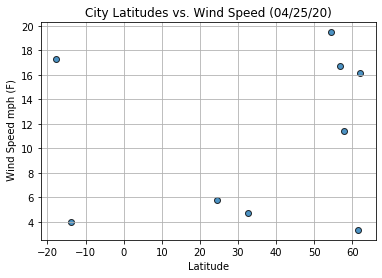

In [15]:
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidth =1, marker ="o",
            alpha = 0.8 , label = "Cities")

plt.title(f"City Latitudes vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel(" Wind Speed mph (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot

plt.show()

## Linear Regression

In [26]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    #Run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values *slope + intercept 
    line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    #plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The R-squared is : {rvalue}")
    plt.show()
    

In [27]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared is : -0.9264351655727017


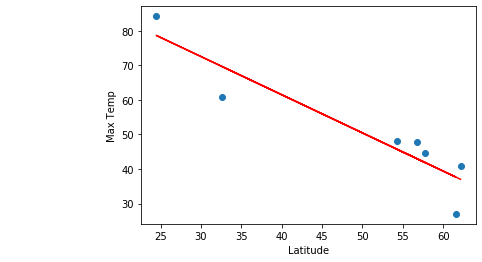

In [28]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (6, 30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-squared is : 1.0


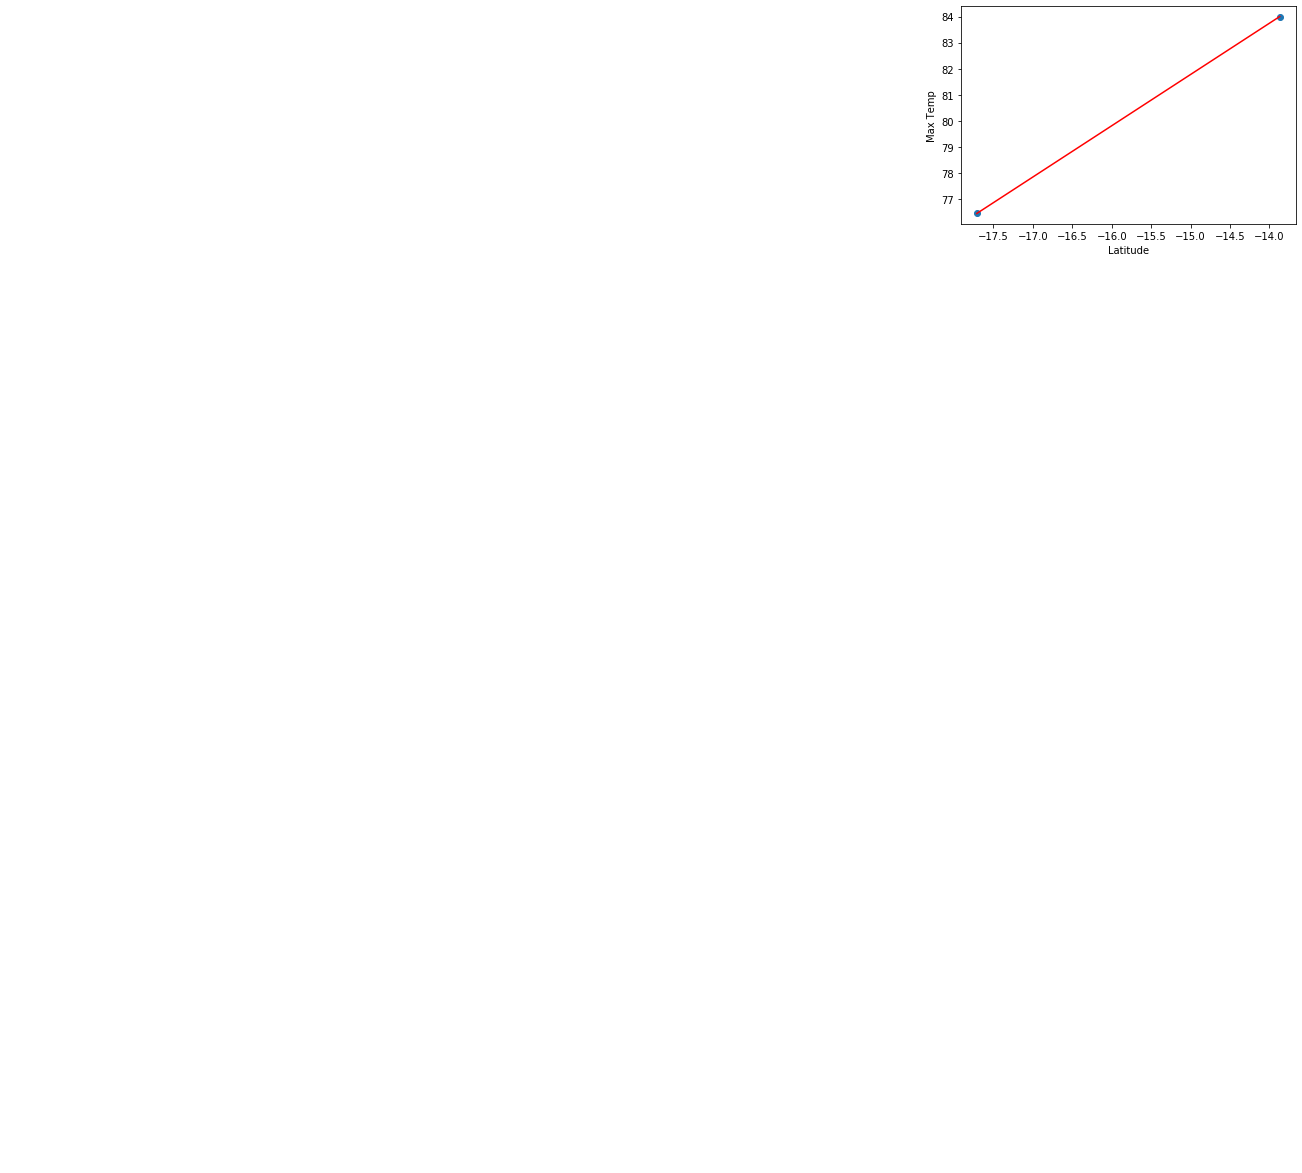

In [29]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-30, 40))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared is : 0.706275901887174


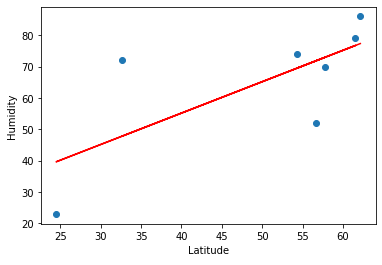

In [30]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (40, 10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R-squared is : -1.0


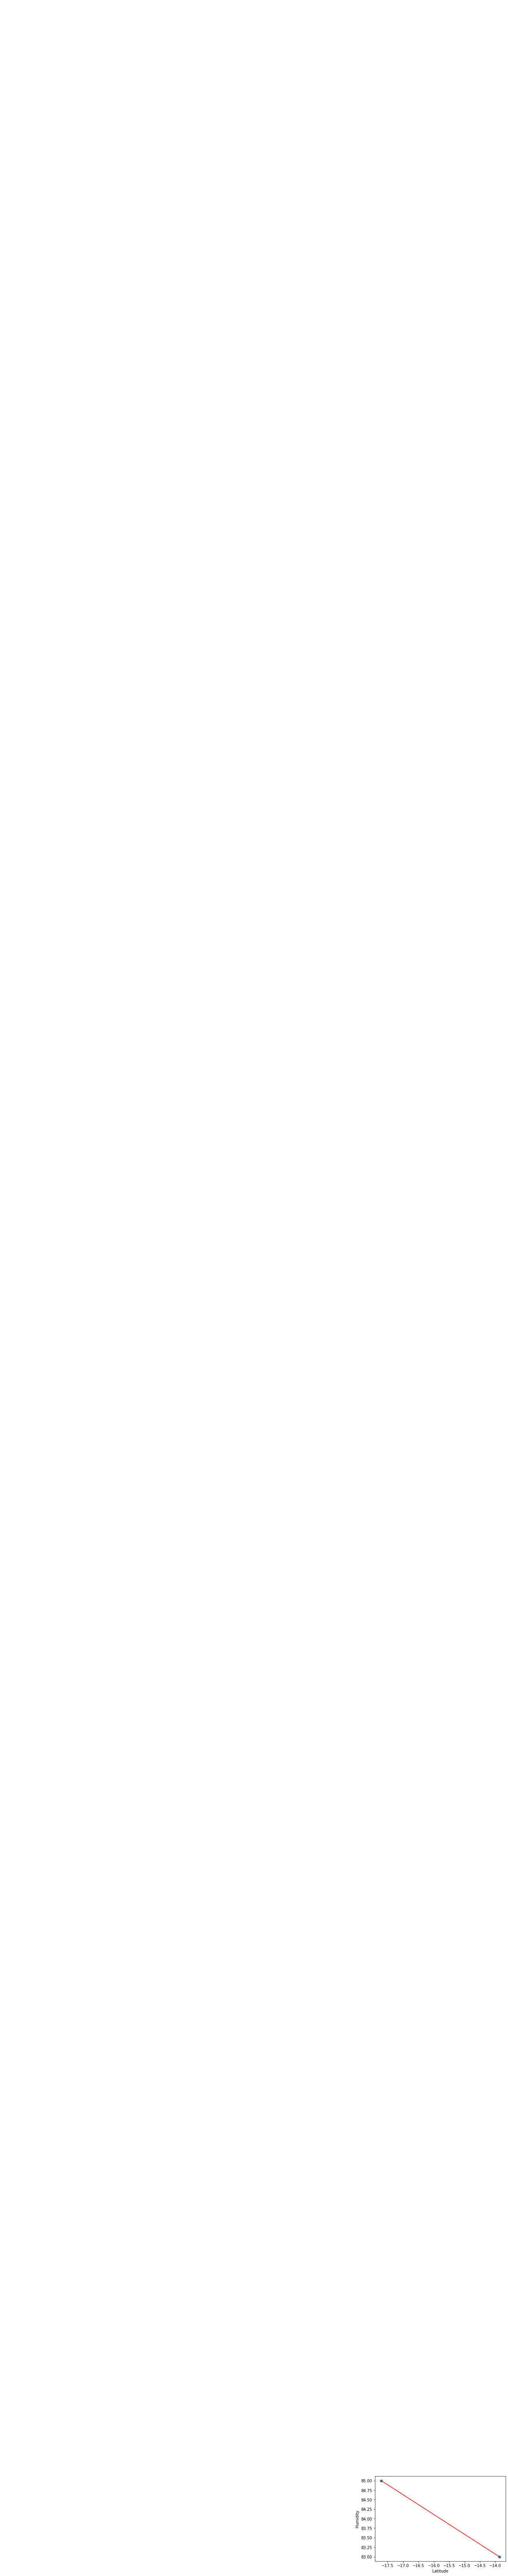

In [31]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-30, 150))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared is : 0.710935873341437


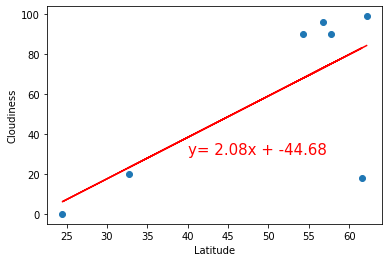

In [32]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40, 30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-squared is : 1.0


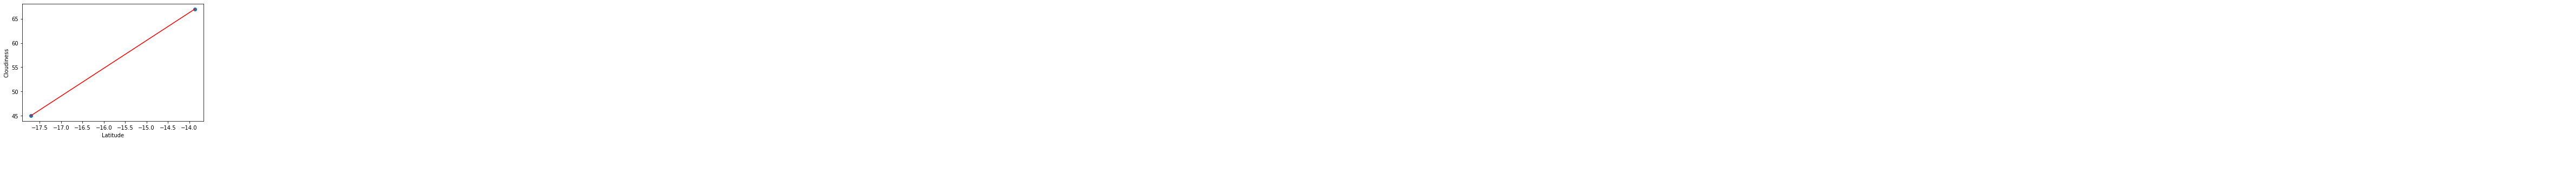

In [36]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40, 30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared is : 0.49825095360925725


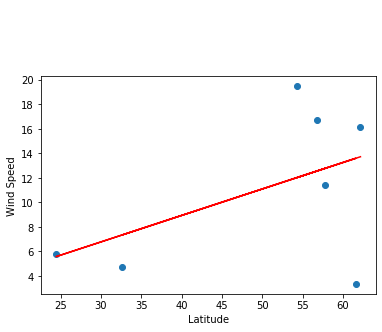

In [34]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40, 25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-squared is : -1.0


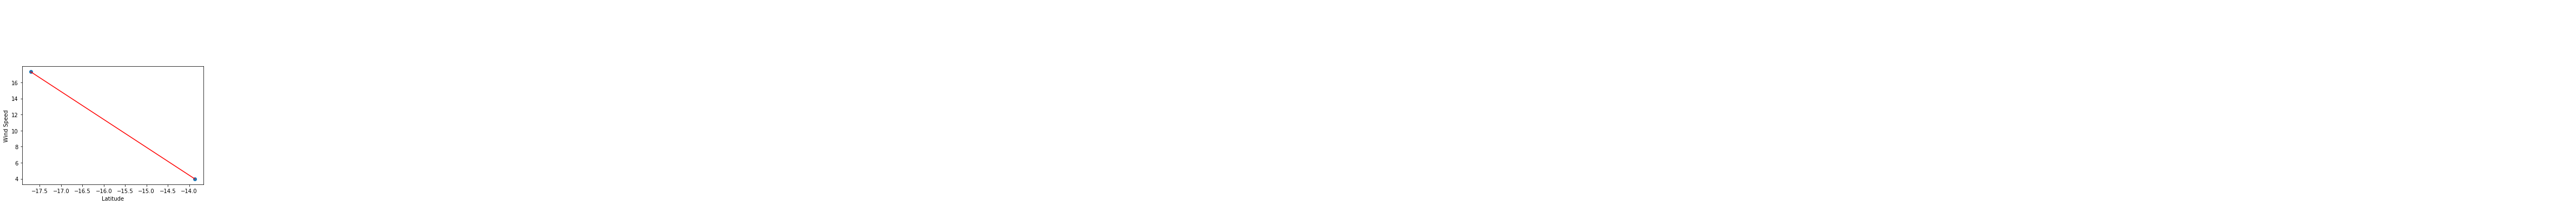

In [41]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40, 25))